DataSource : https://www.insee.fr/fr/statistiques/serie/000442423#Tableau

# Import dependencies

In [7]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Loading Dataset and Data Cleaning

In [49]:
df = pd.read_csv("evolutionprixpain.csv",sep=";")
df.head()

,Année,Mois,Valeur
0,2021,Octobre,3.59
1,2021,Septembre,3.59
2,2021,Août,3.59
3,2021,Juillet,3.58
4,2021,Juin,3.58


Text(0, 0.5, 'Price (€)')

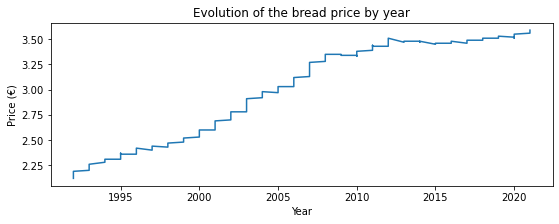

In [51]:
%matplotlib inline

plt.figure(figsize=(9, 3))
df.reindex(index=df.index[::-1])
plt.plot(df['Année'], df['Valeur'])  
plt.title(label='Evolution of the bread price by year')
plt.xlabel(xlabel='Year')  
plt.ylabel(ylabel='Price (€)') 

In [28]:
french_month = {"01": "Janvier", "02": "Février", "03": "Mars", 
"04": "Avril", "05": "Mai", "06": "Juin",
"07": "Juillet", "08": "Août", "09": "Septembre", 
"10": "Octobre", "11": "Novembre", "12": "Décembre"}


for k, v in french_month.items():
    df.loc[df.Mois == v, 'Mois'] = k


df['AAAA-MM'] = df['Année'].astype(str) + "-" + df['Mois'].astype(str)

df.columns.drop(['Année','Mois'])

df.rename(columns={'Valeur': 'Y', 'AAAA-MM': 'DS'})

df.head()


,Année,Mois,Valeur,AAAA-MM
0,2021,10,3.59,2021-10
1,2021,09,3.59,2021-09
2,2021,08,3.59,2021-08
3,2021,07,3.58,2021-07
4,2021,06,3.58,2021-06


# Forescast

In [29]:
df_forescast = df[['AAAA-MM', 'Valeur']].copy()
df_forescast.rename(columns={'AAAA-MM': 'ds', 'Valeur': 'y'}, inplace=True, errors='raise')
df_forescast['y'].astype(float)
df_forescast.head()

,ds,y
0,2021-10,3.59
1,2021-09,3.59
2,2021-08,3.59
3,2021-07,3.58
4,2021-06,3.58


In [30]:
model = Prophet()
model.fit(df_forescast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = model.make_future_dataframe(periods=365)
future.tail()m

,ds
718,2022-09-27
719,2022-09-28
720,2022-09-29
721,2022-09-30
722,2022-10-01


In [31]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
718,2022-09-27,3.604286,3.582768,3.625472
719,2022-09-28,3.602145,3.581696,3.623564
720,2022-09-29,3.599355,3.578212,3.619997
721,2022-09-30,3.595966,3.574734,3.616330
722,2022-10-01,3.592043,3.570354,3.613355


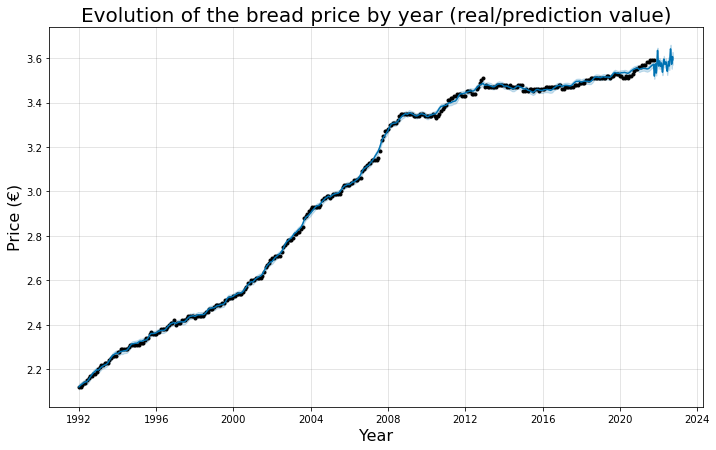

In [39]:
forecast_fig = model.plot(forecast)
ax = forecast_fig.gca()
ax.set_title("Evolution of the bread price by year (real/prediction value)", size=20)
ax.set_xlabel("Year", size=16)
ax.set_ylabel("Price (€)", size=16)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

Text(0.5, 1.0, 'Trend')

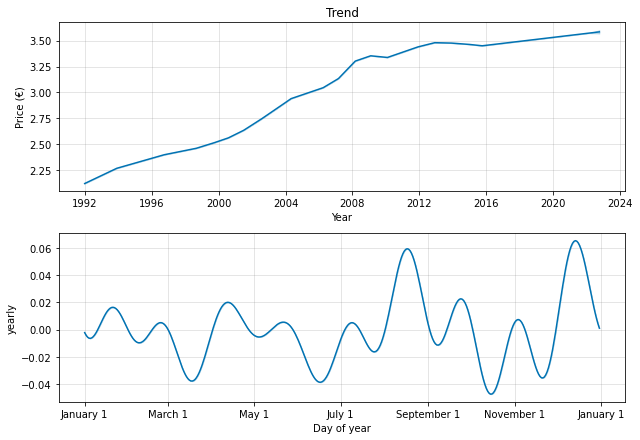

In [46]:
components_fig = model.plot_components(forecast)

axes = components_fig.get_axes()
# First graph
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Price (€)')
axes[0].set_title('Trend')

In [17]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [48]:
plot_components_plotly(model, forecast)